<a href="https://colab.research.google.com/github/egenya/DataAnalyst_learn/blob/main/HW_ML_2_decision_tree___ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green' size='7'>**Домашняя работа 2**</font>  
<font color='#11a642' size='6'>**Тема: Машинное обучение. Алгоритм Дерево решений**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s4e12

Что нужно сделать:

1. Загрузить данные c конкурса  https://www.kaggle.com/competitions/playground-series-s4e12.
2. Проведисти разведочный анализ данных (EDA)  
3. Построить деревья решений
4. Опционально. Загрузите решение на kaggle





# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [3]:
from google.colab import drive
import json
import zipfile

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score, max_error

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# <font color='#11a642' size='6'> **Загрузка данных**

In [4]:
def load_dataset(from_kaggle:bool = False) -> pd.DataFrame:
  '''
  Функция скачивает данные с сайта kaggle, если установлен from_kaggle=True,
  инчае архив считывается по ссылке с гугл диска (такой способ удобен тем, у кого нет доступа к kaggle)
  params:
      - from_kaggle - индикатор откуда скачивать данные (True - c сайта kaggle, False -  c google диска)
  return:
      - pd.DataFrame

  '''
  if from_kaggle:
    # запросит разрешение к гугл диску, необходимо дать это разрешение
    drive.mount('/content/drive')
    # установим kaggle
    !pip install kaggle -q
    !mkdir ~/.kaggle
    # копируем kaggle.json (предварительно, необходимо сгенерить токен на
    # сайте kaggle и сохранить к себе на гугл диск) в папку ~/.kaggle/
    !cp "/content/drive/MyDrive/Colab Notebooks/config/kaggle.json" ~/.kaggle/
    !kaggle competitions download -c playground-series-s4e12
  else:
    !gdown 1-730JF1IWA5e_ejuXWLmkkzHFvudisdp
  # распаковка архива
  zip_ref = zipfile.ZipFile('playground-series-s4e12.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()
  df_train = pd.read_csv('train.csv')
  df_test = pd.read_csv('test.csv')
  df_sample_submission = pd.read_csv('sample_submission.csv')
  return df_train, df_test, df_sample_submission

In [5]:
df_train, df_test, df_sample_submission = load_dataset(from_kaggle=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-730JF1IWA5e_ejuXWLmkkzHFvudisdp
From (redirected): https://drive.google.com/uc?id=1-730JF1IWA5e_ejuXWLmkkzHFvudisdp&confirm=t&uuid=5d81ddc1-72e5-4496-af81-5f83e65846a0
To: /content/playground-series-s4e12.zip
100% 79.1M/79.1M [00:01<00:00, 58.1MB/s]


In [6]:
# на этих данных дальше необходимо разработать модель
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [7]:
# Посмотрим все столбцы
pd.set_option('display.max_columns', 20)

In [8]:
# Проверим на дубликаты
df_train.duplicated().sum()

0

In [9]:
# Заменинм название столбцов на нижний регистр и соединим нижним подчеркиваением
df_train.columns = [col.lower().replace('?', '').rstrip().replace(' ', '_').replace('/', '_') for col in df_train]

## <font color='#11a642' size='5'> Определить роли для независимых признаков

In [10]:
# Разабьем наши столбцы на категориальные и числовые
id = ['id', 'policy_start_date'] # столбец ID
target = 'premium_amount' # столбец с целевой переменной


# <font color='#11a642' size='6'> **Разведочный анализ данных**

## <font color='#11a642' size='5'> Оцените размер вашего датасета


1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [11]:
# Сколько ГБ наш датасет
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   age                   1181295 non-null  float64
 2   gender                1200000 non-null  object 
 3   annual_income         1155051 non-null  float64
 4   marital_status        1181471 non-null  object 
 5   number_of_dependents  1090328 non-null  float64
 6   education_level       1200000 non-null  object 
 7   occupation            841925 non-null   object 
 8   health_score          1125924 non-null  float64
 9   location              1200000 non-null  object 
 10  policy_type           1200000 non-null  object 
 11  previous_claims       835971 non-null   float64
 12  vehicle_age           1199994 non-null  float64
 13  credit_score          1062118 non-null  float64
 14  insurance_duration    1199999 non-

*Наши данные имют 192.3+ MB

*Строк  1200000 и столбцов 21 столбец
10 числовых и 11 категориальных

In [12]:
# Удалим не значимые для нас столбцы
del df_train["id"]
del df_train["policy_start_date"]

* Проведем равзедочный анализ по категорильным столбцам и по численным отдельно

In [13]:
df_train

,age,gender,annual_income,marital_status,number_of_dependents,education_level,occupation,health_score,location,policy_type,previous_claims,vehicle_age,credit_score,insurance_duration,customer_feedback,smoking_status,exercise_frequency,property_type,premium_amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,Poor,No,Daily,Apartment,1303.0
1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,Poor,No,Weekly,Apartment,821.0
1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,Good,No,Monthly,Condo,371.0
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,Poor,No,Daily,Apartment,596.0


## <font color='#11a642' size='5'> Анализ числовых (непрерывных) признаков

In [14]:
# Посмотрим на наш таргет
df_train['premium_amount'].describe()

,premium_amount
count,1.200000e+06
mean,1.102545e+03
std,8.649989e+02
min,2.000000e+01
25%,5.140000e+02
50%,8.720000e+02
75%,1.509000e+03
max,4.999000e+03


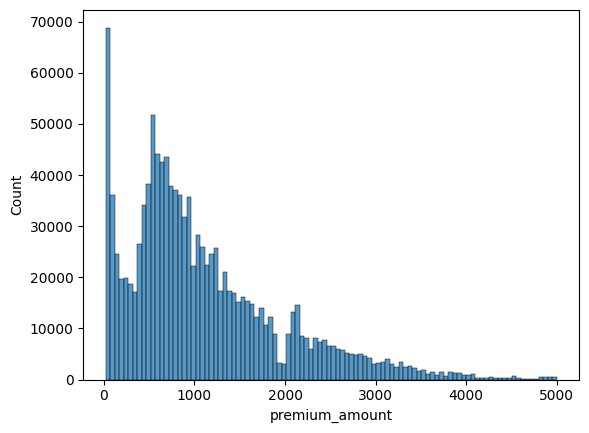

In [15]:
#  посмотрим на графике
sns.histplot(df_train['premium_amount'], bins=100)
plt.show()

In [ ]:
# Согласно данному графику можно предположить, что имеется большой хвост т.е. выбросы в виде очень дорогих полисов страхования, и очень дешовых полисов.

* И для всех числовых столбцов


In [16]:
# Рассмотрим наши числовые данные
df_train.describe()

,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,premium_amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [17]:
# Разделим на категориальные и числовые
features_cat = [col for col in df_train.select_dtypes(exclude='number').columns if col != id and col !=target]
features_num = [col for col in df_train.select_dtypes(include='number').columns if col != id and col !=target]

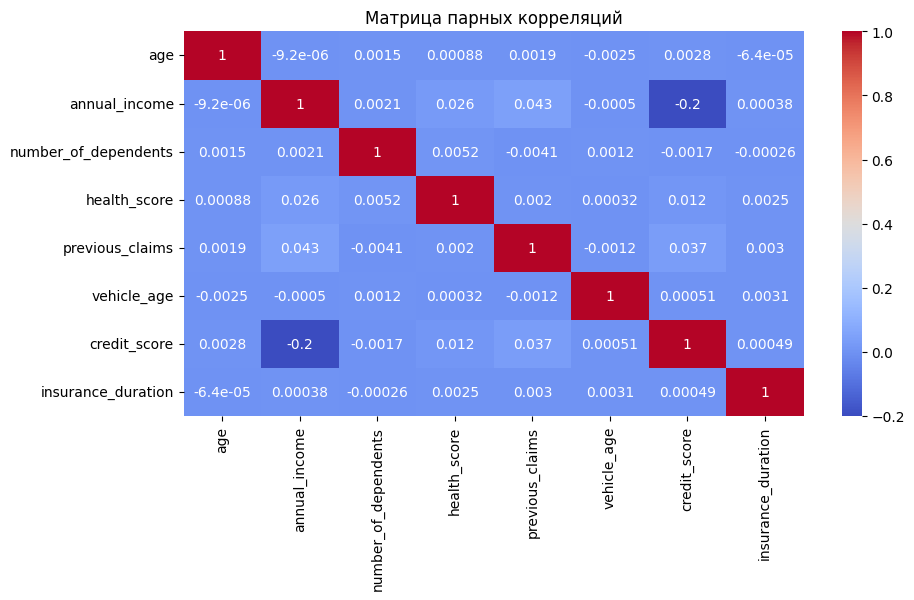

In [18]:
# Посмотрим как коррелируют между собой значения или нет
correlation_matrix = df_train[features_num].corr()

# Визуализация матрицы парных корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

In [ ]:
# Посмотрев матрицу корреляций не найдены занчения которые коррелируют. Будем исследовать дальше

# <font color='#11a642' size='6'> **Подготовка данных к обучению**



1.   Обработка категориальных переменных.
2.   Обработка пропусков

In [19]:
# Преобразуем категориальные столбцы в булевы занчения
#  Посмотрим количество уникальных значений
df_train[features_cat].describe()

,gender,marital_status,education_level,occupation,location,policy_type,customer_feedback,smoking_status,exercise_frequency,property_type
count,1200000,1181471,1200000,841925,1200000,1200000,1122176,1200000,1200000,1200000
unique,2,3,4,3,3,3,3,2,4,3
top,Male,Single,Master's,Employed,Suburban,Premium,Average,Yes,Weekly,House
freq,602571,395391,303818,282750,401542,401846,377905,601873,306179,400349


In [20]:
# У нас 10 категориальных столбцов. Это нам необходимо для опредения на сколько увеличатся гаши столбуы после примения обработки данных столбцов

* Вывод принемаем решение не трогать выбросы. Так как это могуть быть данные, где действительно очень дорогие полисы или очень дешевые

## <font color='#11a642' size='5'> Анализ пропусков


In [21]:
# Посмотрим количество порусков и проссумируем по каждому столбцу
df_train.isna().sum()

,0
age,18705
gender,0
annual_income,44949
marital_status,18529
number_of_dependents,109672
education_level,0
occupation,358075
health_score,74076
location,0
policy_type,0


* Рассмотрим и запоним пропуски. в 10 столбцах есть пропущенные значения. И данные столбцы содержат числовые параметры.

In [22]:
# Посмотрим процентное соотношение пропусков
for col in df_train.columns:
  print(f'{col}: {df_train[col].isna().sum() / df_train.shape[0] * 100:.2f}%')

age: 1.56%
gender: 0.00%
annual_income: 3.75%
marital_status: 1.54%
number_of_dependents: 9.14%
education_level: 0.00%
occupation: 29.84%
health_score: 6.17%
location: 0.00%
policy_type: 0.00%
previous_claims: 30.34%
vehicle_age: 0.00%
credit_score: 11.49%
insurance_duration: 0.00%
customer_feedback: 6.49%
smoking_status: 0.00%
exercise_frequency: 0.00%
property_type: 0.00%
premium_amount: 0.00%


In [23]:
# Так как данных в нашем df 1200000, модель может потратить много времени для обработки. Выберем самые значимые столбцы на наш взгляд.

In [24]:
# удаление столбцов
df_train_1 = df_train.drop(['marital_status',
 'education_level',
 'occupation',
 'location',
 'customer_feedback',
 'property_type', 'number_of_dependents', 'credit_score', 'annual_income'], axis=1)

In [25]:
df_train_1.shape

(1200000, 10)

In [26]:
# проверим данные после удаления столбцов
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   age                 1181295 non-null  float64
 1   gender              1200000 non-null  object 
 2   health_score        1125924 non-null  float64
 3   policy_type         1200000 non-null  object 
 4   previous_claims     835971 non-null   float64
 5   vehicle_age         1199994 non-null  float64
 6   insurance_duration  1199999 non-null  float64
 7   smoking_status      1200000 non-null  object 
 8   exercise_frequency  1200000 non-null  object 
 9   premium_amount      1200000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 91.6+ MB


In [27]:
# Преобразуем катгорилаьные столбцы
df_train_1 = pd.get_dummies(df_train_1, drop_first=True)

In [28]:
# В столбце "insurance_duration" удалим пропущенное зачение, т.к очень мало в отношее к общему количеству строк
df_train_1= df_train_1.dropna(subset= 'insurance_duration',  axis= 0)

In [29]:
# Заменим на среднее значение
df_train_1['vehicle_age'].fillna(df_train_1['vehicle_age'].mean(), inplace= True)

<ipython-input-29-bb5e9bd5510a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_1['vehicle_age'].fillna(df_train_1['vehicle_age'].mean(), inplace= True)


In [30]:
# age_mode произвденм замену на часто используемое (мода)
# Находим моду
age_mode = df_train_1['age'].mode().iloc[0]
age_mode

53.0

In [31]:
# Производим замену
df_train_1['age']=df_train_1['age'].fillna(age_mode)
df_train_1['age'].isna().sum()

0

In [32]:
#  previous_claims
# Заменим на среднее
df_train_1['previous_claims'].fillna(df_train_1['previous_claims'].mean(), inplace= True)

<ipython-input-32-04ad0af4252f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_1['previous_claims'].fillna(df_train_1['previous_claims'].mean(), inplace= True)


In [33]:
# Преобразуем health_score
# Заменим на медиану, так как она более усточива к выбросам
df_train_1['health_score'].fillna(df_train_1['health_score'].median(), inplace= True)

<ipython-input-33-550e4046eb7d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_1['health_score'].fillna(df_train_1['health_score'].median(), inplace= True)


In [34]:
# Проверим пропуски
df_train_1.isna().sum()

,0
age,0
health_score,0
previous_claims,0
vehicle_age,0
insurance_duration,0
premium_amount,0
gender_Male,0
policy_type_Comprehensive,0
policy_type_Premium,0
smoking_status_Yes,0


# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [35]:
X = df_train_1.drop(columns=[target])
y = df_train_1[target]

In [36]:
# разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
# Нормализация данных не побтребуется так как мы планирует использовать модель дерево решений

# <font color='#11a642' size='6'> **Построение модели дерево решений**

## <font color='#11a642' size='5'> Построение максимального дерева без ограничений на гиперпараметры


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


In [ ]:
# Создадим дерево

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
probability = clf.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, prediction))


Accuracy: 0.030675


### <font color='#11a642' size='4'> Оценка качества  максимального дерева без ограничений на гиперпараметры


In [28]:
# Найдем на сколько наша модель ошибается
y_pred = clf.predict(X_test)

In [29]:
  y_pred_test = clf.predict(X_test)

In [30]:
# Посмотрим разность между тестовыми данными и данными обученными (остатки)
y_res_test = y_test - y_pred_test

<Axes: xlabel='premium_amount', ylabel='Count'>

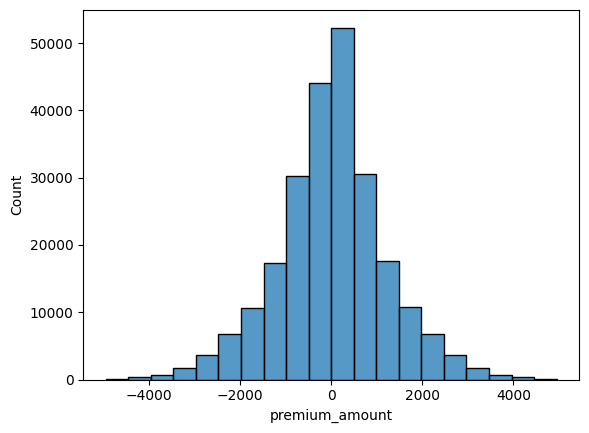

In [ ]:
# Построим график наших данных
sns.histplot(y_res_test, bins =20)

In [ ]:
# Наш график похож на нормальное распредение, следовательно можно предположить что модель построена верно

## <font color='#11a642' size='5'> Построение дерева с поиском наилучших гиперапарметров


In [52]:
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, accuracy_score, classification_report

In [61]:
# Создаем нашу модель для поиска наилучших параметров
gs_tree = GridSearchCV(clf, params_set, cv= 3, scoring = 'neg_mean_squared_log_error', n_jobs=-1,verbose=1)

In [86]:
# Переберем занчения параметров.min_samples_leaf мин. кол-во листов, min_samples_split  мин. кол-во ветвей, max_depth глубина дерева
params_set ={'max_depth': [2, 3, 5], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [4, 6, 8]}

In [63]:
# Воспольщуемся gridSearch на тренировочных данных cv  перекрестная проверка ,

In [87]:
gs_tree.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 4]},
             scoring='neg_mean_squared_log_error', verbose=1)

In [88]:
# Запустим обучение дерева решений, чтобы подобрать значения гиперпараметров:
gs_tree_pred = gs_tree.predict(X_test)

In [89]:
gs_tree.best_score_

-12.37246262824961

### <font color='#11a642' size='4'> Оценка качества  дерева с оптимальными гиперпараметрами


In [90]:
# Выведем оптимизированные значения:

print('Лучшие параметры дерева решений: {}'.format(gs_tree.best_params_))
print('Доля правильных ответов: %0.3f' % (gs_tree.score(X_test,y_test)))
print('Доля правильных ответов кросс-валидации: %0.3f' % gs_tree.best_score_)


Лучшие параметры дерева решений: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Доля правильных ответов: -12.298
Доля правильных ответов кросс-валидации: -12.372


In [91]:
y_pred_test =gs_tree.best_estimator_.predict(X_test)

<Axes: xlabel='premium_amount', ylabel='Count'>

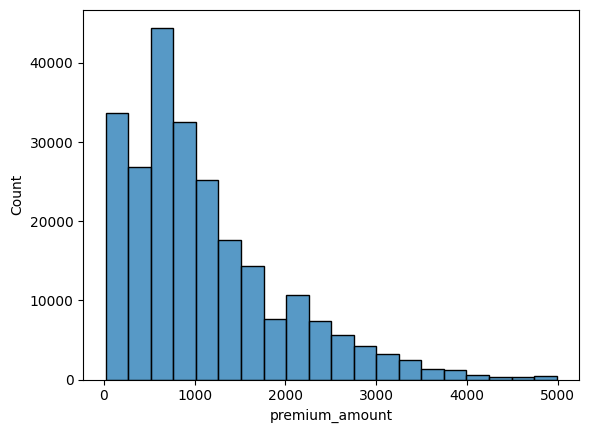

In [92]:
sns.histplot(y_test, bins =20)

In [ ]:
# Данное реево решений с оптимальными гиперпараметрами и построив график предсказанийю График должен быть похож на равномерное распеделение.
# Возможно данная модель не подходит для большого объема данных

### <font color='#11a642' size='4'> Нарисуйте дерево с оптимальными гиперпараметрами


In [80]:
clf = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 2, min_samples_split = 2)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
probability = clf.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, prediction))

Accuracy: 0.003470833333333333


In [84]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'x[2] <= 1.501\ngini = 0.999\nsamples = 959999\nvalue = [3075.0, 279.0, 1348.0 ... 1.0, 2.0, 1.0]'),
 Text(0.25, 0.5, 'x[1] <= 24.534\ngini = 0.999\nsamples = 775788\nvalue = [2401.0, 225.0, 1030.0 ... 1.0, 2.0, 1.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.999\nsamples = 362450\nvalue = [1151.0, 127.0, 514.0 ... 1.0, 1.0, 1.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.999\nsamples = 413338\nvalue = [1250.0, 98.0, 516.0 ... 0.0, 1.0, 0.0]'),
 Text(0.75, 0.5, 'x[1] <= 18.927\ngini = 0.999\nsamples = 184211\nvalue = [674.0, 54.0, 318.0 ... 0.0, 0.0, 0.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.999\nsamples = 58646\nvalue = [219.0, 24.0, 103.0 ... 0.0, 0.0, 0.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.999\nsamples = 125565\nvalue = [455, 30, 215 ... 0, 0, 0]')]

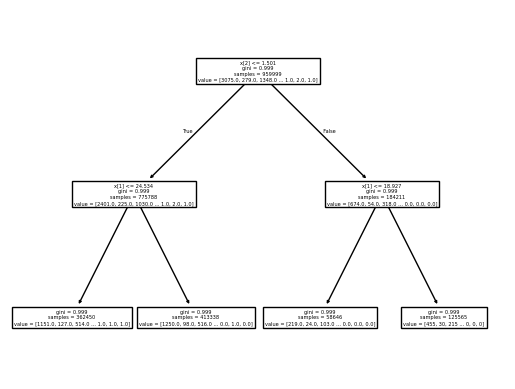

In [85]:
# Ошибок снова очень много. Построим дерево решений
tree.plot_tree(clf)

## <font color='#11a642' size='5'> Построение ансамбля деревьев решений


In [ ]:
# Случайный поиск гиперпараметров (RandomForestRegressor) - мощный алгоритм машинного обучения, который широко используется для решения задач устойчивым к
# переобучению и способным обрабатывать большие объемы данных.

In [81]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
print("\nRandom Forest Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, prediction))



Random Forest Metrics:
MSE: 774068.7593658397
MAE: 689.2671837980987
R2: -0.038852602265557534
Accuracy: 0.003470833333333333


* Вывод. Посмотрев метрики мы видим что наша цель достич  Accuracy равную 1 не увеньчалась успехом.

### <font color='#11a642' size='4'> Ввыводы


* Исследую данный дата фрецм на модели Дерево решений с подбором гиперпараметров для улучшения работы модели. Мы посмотрели показатели Accuracy - на сколько наша модель ошибается и у нас получился очень маленькое число. Следовательно выбранные нами модели не подходят для работы с такими данными. Возможно необходимо более глубоко исследовать сами стообцы и возможно иным образом запонить пустые занчения. И у меня было предположение возможно тут данные собранные для двух разнах полисов страхования. Страхование жизни клиента и Страховнаие автомобиля.

---



### <font color='#11a642' size='4'> Ваши выводы


# <font color='#11a642' size='6'> **Опционально, для тех, кто хочет сравнить свое решение с другими решениями на kaggle. Применение алгоритма к тестовой выборке df_test и сабмит решения на kaggle**

In [ ]:
# это данные для примера, в таком виде необходимо сделать выборку и загрузить на kaggle
#  (для тех, кто хочет увидеть себя в лидерборде и оценить на сколько ваше решение лучше/хуже остальных data scientist)
df_sample_submission.head()

In [ ]:
# это тестовые данные, для которых необходимо предсказать target, то есть применить модель,
#  которую разработали на данных df_train
df_test.head()

In [ ]:
# ваш код

In [ ]:
# # загрузка данных на kaggle (нужен доступ на kaggle)
# kaggle competitions submit -c playground-series-s4e12 -f submission.csv -m "1 submit"